In [54]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [55]:
data=pd.read_csv(r"C:\Users\DELL\Downloads\student_performance\student_performance\data\student.csv")

In [56]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [57]:
data.shape

(1000, 8)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [59]:
cat_col=[fea for fea in data.columns if data[fea].dtype=='O']

In [60]:
data[cat_col]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [61]:
num_col=[fea for fea in data.columns if data[fea].dtype!='O']


In [62]:
data[num_col]

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [63]:
data.memory_usage()

Index                           128
gender                         8000
race/ethnicity                 8000
parental level of education    8000
lunch                          8000
test preparation course        8000
math score                     8000
reading score                  8000
writing score                  8000
dtype: int64

In [64]:
##checking whether our data have missing value or not
data.isnull()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [65]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [66]:
data.isnull().sum().sum()   #gives entire sum

0

In [67]:
data.duplicated()   #checks if there are any duplicates

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [68]:
data.duplicated().sum()  # gives the sum of the duplicates 

0

In [69]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [70]:
#we can check these unique values also
l=[]

for i in data.columns:
    k=data[i].unique()
    l.append(k)


In [71]:
print(l)

[array(['female', 'male'], dtype=object), array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object), array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object), array(['standard', 'free/reduced'], dtype=object), array(['none', 'completed'], dtype=object), array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8], dtype=int64), array([ 72,  90,  95,  57,  78,  83,  43,  64,  60,  54,  52,  81,  53,
        75,  89,  32,  42,  58,  69,  73,  71,  74,  70,  65,  87,  56,
        61,  84, 

In [72]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [73]:
#we can apply transpose also for that we need to do as 

data.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [74]:
#checkig correlation of the data

data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


From the above correlation result we can say that if a person is a good reader then the person is also a good writer

In [75]:
#finding the covariance of the data

data.cov()

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


In [76]:
data.skew()
#if the value is less than zero it is left skewed 
# if the value is greaterthan zero it is right skewed


math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

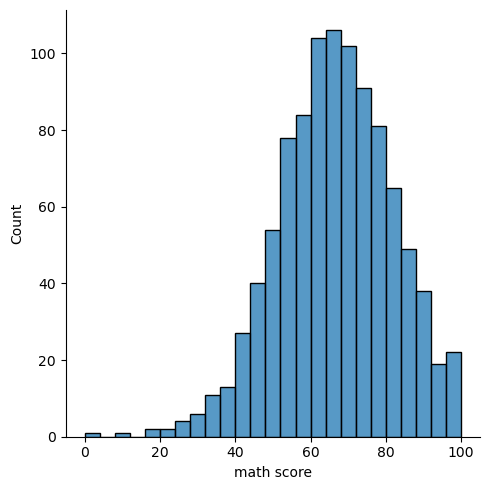

In [77]:
sns.displot(data["math score"])

In [78]:
#finding the averages of the maths score column,reading score columns and writing score columnn
(data['math score']+data['reading score']+data['writing score'])/3

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Length: 1000, dtype: float64

In [79]:
#adding the average column to the data frame

data['average']=(data['math score']+data['reading score']+data['writing score'])/3

In [80]:
data.groupby('gender').mean()

,math score,reading score,writing score,average
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


In [81]:
data.groupby('gender').count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
gender,,,,,,,,
female,518,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482,482


In [82]:
len([i for i in data["math score"] if i<30])  # this line of code gives the no of students ehose score is less than 30 in maths

data[data["math score"] < 30].count()  # this is also another method




gender                         14
race/ethnicity                 14
parental level of education    14
lunch                          14
test preparation course        14
math score                     14
reading score                  14
writing score                  14
average                        14
dtype: int64

checking the normality of the data

In [83]:
data_num=data[num_col]


In [84]:
from scipy.stats import normaltest

In [85]:
stattistic,pvalue=normaltest(data_num["math score"])
pvalue        # if p avlue is greater than 0.05 then the data is called as normally distributed otherwise it is not normally distributed

0.00045080293869937836

In [86]:
if pvalue>0.05:
    print("data id normally distributed")
else:
    print("the data is not normally distributed")
    

the data is not normally distributed


<Axes: xlabel='math score', ylabel='Density'>

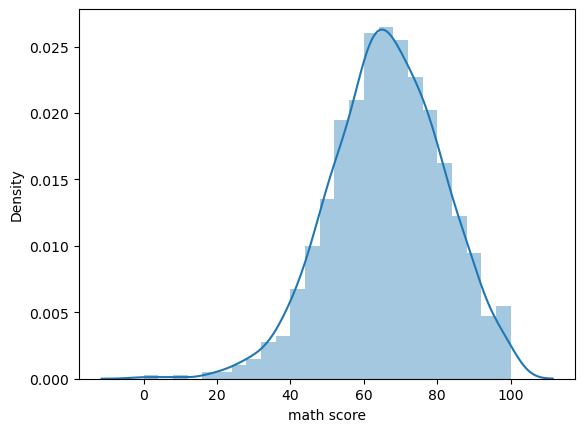

In [87]:
sns.distplot(data["math score"])

<Axes: xlabel='reading score', ylabel='Density'>

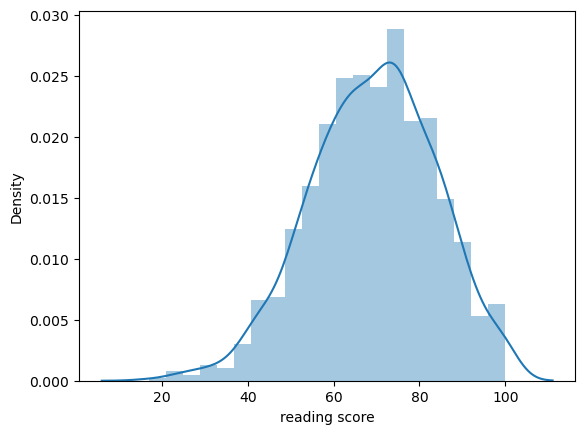

In [88]:
sns.distplot(data["reading score"])

<Axes: xlabel='writing score', ylabel='Density'>

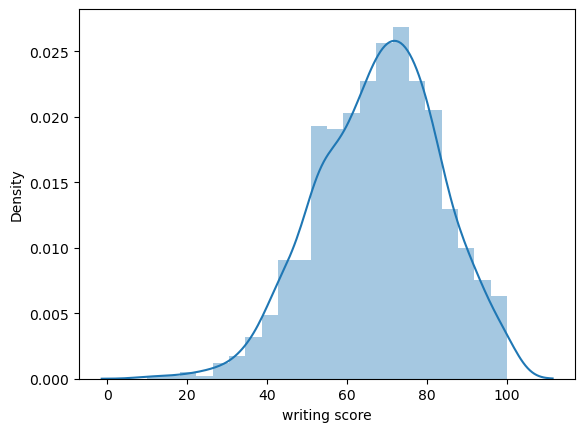

In [89]:
sns.distplot(data["writing score"])

<Axes: >

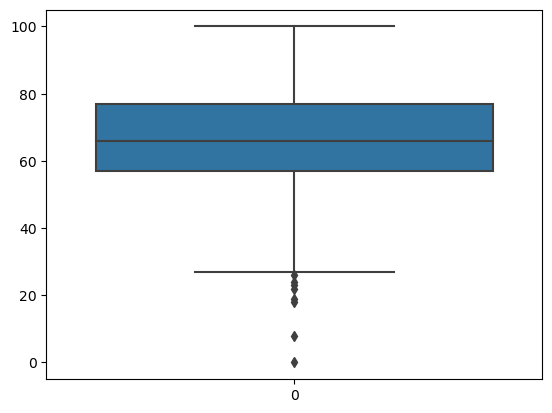

In [90]:
#checking outlier in the data

sns.boxplot(data=data["math score"])

<Axes: >

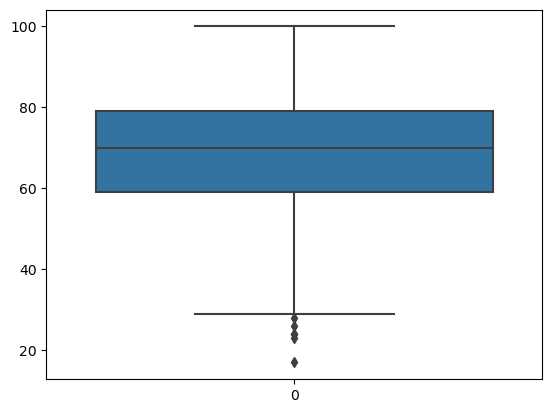

In [91]:
sns.boxplot(data["reading score"])

<Axes: >

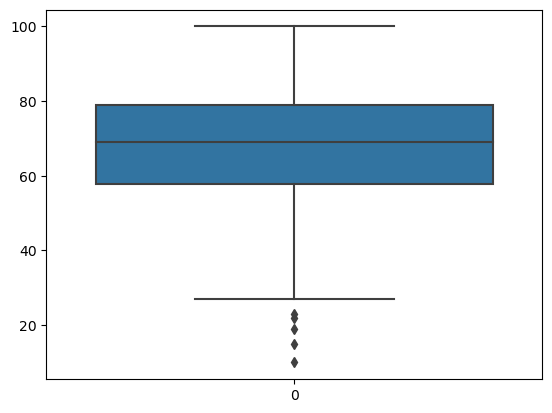

In [92]:
sns.boxplot(data["writing score"])

In [93]:
q1=data["math score"].quantile(0.25)
q1

57.0

In [94]:
q3=data["math score"].quantile(0.75)
q3

77.0

In [95]:
IQR=q3-q1
IQR

20.0

In [96]:
ul=q3+(1.5*IQR)
ul

107.0

In [97]:
ll=q1-(1.5*IQR)
ll

27.0

In [98]:
data[data['math score']>ul]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average


In [99]:
data[data['math score']<ll]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
17,female,group B,some high school,free/reduced,none,18,32,28,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,9.000000
145,female,group C,some college,free/reduced,none,22,39,33,31.333333
338,female,group B,some high school,free/reduced,none,24,38,27,29.666667
466,female,group D,associate's degree,free/reduced,none,26,31,38,31.666667
787,female,group B,some college,standard,none,19,38,32,29.666667
842,female,group B,high school,free/reduced,completed,23,44,36,34.333333
980,female,group B,high school,free/reduced,none,8,24,23,18.333333


In [100]:
def outliers(data_frame,q1_limit,q3_limit,column):
    q1=data_frame[column].quantile(q1_limit)
    q3=data_frame[column].quantile(q3_limit)
    IQR=q3-q1
    upper_limit=q3+(1.5*IQR)
    lower_limit=q1-(1.5*IQR)
    return upper_limit,lower_limit


In [101]:
k=outliers(data_num,0.25,0.75,"math score")
print(k)

(107.0, 27.0)


In [102]:
for i in data_num.columns:
    k=outliers(data_num,0.25,0.75,i)
    print(k)

(107.0, 27.0)
(109.0, 29.0)
(110.875, 25.875)


In [103]:
data.loc[1:10,"math score"]

1     69
2     90
3     47
4     76
5     71
6     88
7     40
8     64
9     38
10    58
Name: math score, dtype: int64

In [104]:
print(data.loc[data["math score"]==100])

     gender race/ethnicity parental level of education         lunch  \
149    male        group E          associate's degree  free/reduced   
451  female        group E                some college      standard   
458  female        group E           bachelor's degree      standard   
623    male        group A                some college      standard   
625    male        group D                some college      standard   
916    male        group E           bachelor's degree      standard   
962  female        group E          associate's degree      standard   

    test preparation course  math score  reading score  writing score  \
149               completed         100            100             93   
451                    none         100             92             97   
458                    none         100            100            100   
623               completed         100             96             86   
625               completed         100             97    

<Axes: xlabel='math score', ylabel='reading score'>

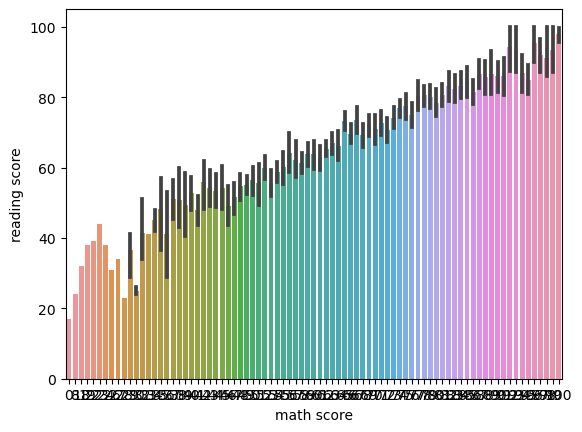

In [ ]:
import seaborn as sns

sns.barplot(x='math score', y='reading score', data=data)



In [ ]:
a=data["math score"].mean()
b=data["reading score"].mean()








In [ ]:
data.groupby("gender").mean()



,math score,reading score,writing score,average
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


<Axes: xlabel='gender', ylabel='count'>

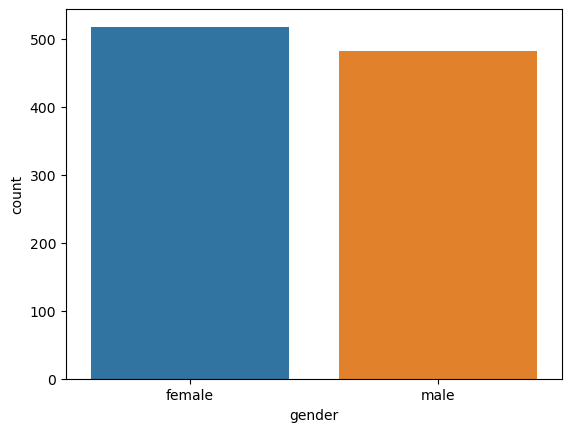

In [ ]:
sns.countplot(data,x="gender")


<Axes: xlabel='race/ethnicity', ylabel='count'>

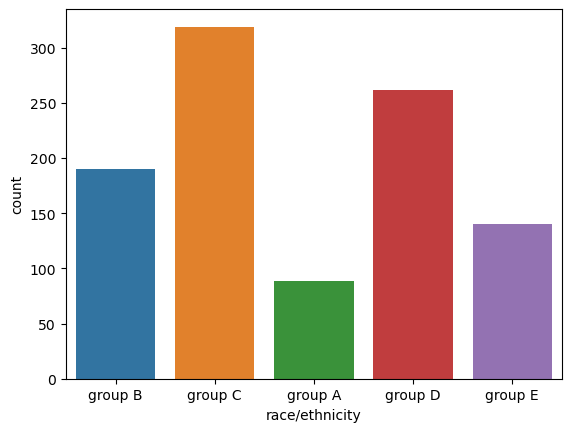

In [ ]:
sns.countplot(data,x="race/ethnicity")

In [ ]:
df=data.groupby("gender").mean()



In [ ]:
df

,math score,reading score,writing score,average
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


In [ ]:
df['average']

gender
female    69.569498
male      65.837483
Name: average, dtype: float64

In [ ]:
female_score=df['average'][0],df['math score'][0]

In [ ]:
female_score

(69.56949806949807, 63.633204633204635)

In [ ]:
male_score=df['average'][0],df['math score'][0]

In [ ]:
male_score

(69.56949806949807, 63.633204633204635)

<BarContainer object of 5 artists>

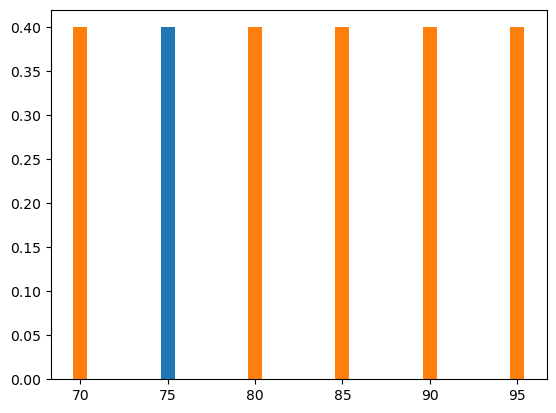

In [ ]:
plt.bar(male_score,0.4,label='male')
plt.bar(female_score,0.4,label='female')

<BarContainer object of 5 artists>

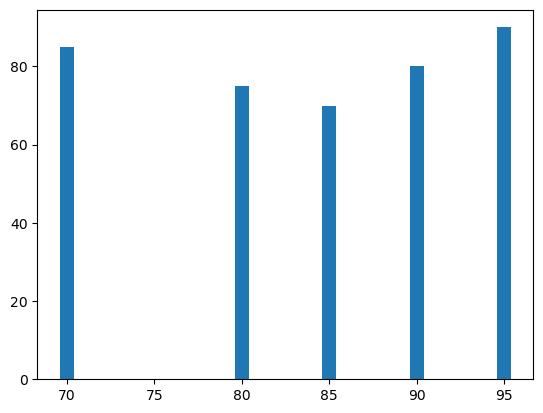

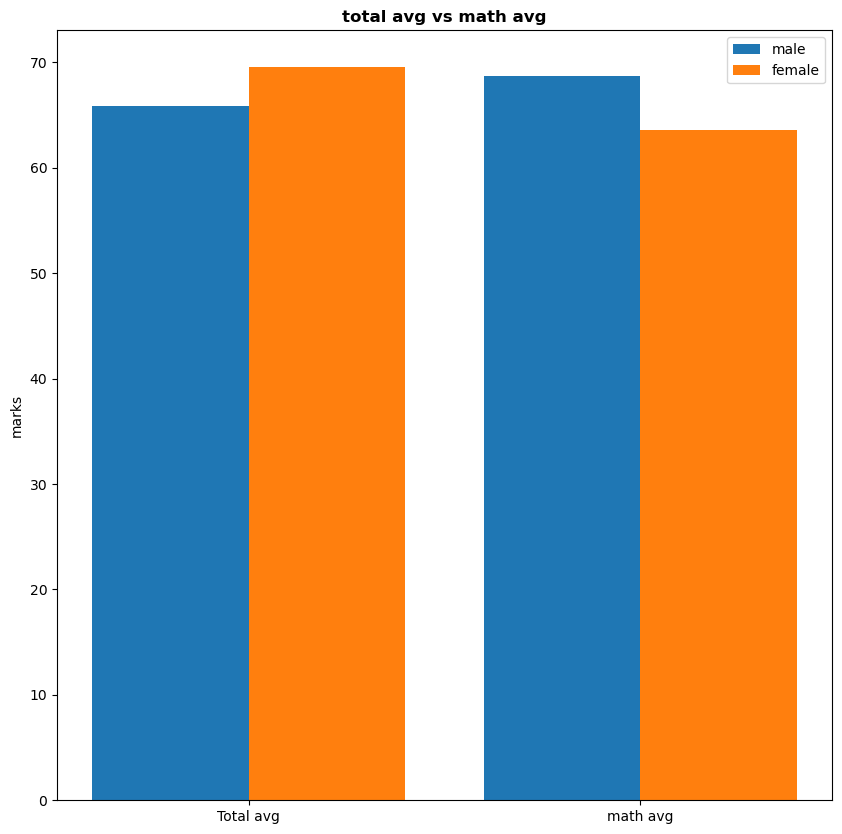

[0 1]


In [ ]:
plt.figure(figsize=(10,10))
X=['Total avg','math avg']
female_score=df['average'][0],df['math score'][0]
male_score=df['average'][1],df['math score'][1]

X_axis=np.arange(len(X))
plt.bar(X_axis-0.2,male_score,0.4,label='male')
plt.bar(X_axis+0.2,female_score,0.4,label='female')

plt.xticks(X_axis,X)
plt.ylabel("marks")
plt.title("total avg vs math avg",fontweight='bold')
plt.legend()
plt.show()
print(X_axis)

In [120]:
l=[]
for index, row in data.iterrows():
    



gender                                    female
race/ethnicity                           group B
parental level of education    bachelor's degree
lunch                                   standard
test preparation course                     none
math score                                    72
reading score                                 72
writing score                                 74
average                                72.666667
Name: 0, dtype: object
gender                               female
race/ethnicity                      group C
parental level of education    some college
lunch                              standard
test preparation course           completed
math score                               69
reading score                            90
writing score                            88
average                           82.333333
Name: 1, dtype: object
gender                                  female
race/ethnicity                         group B
parental level of educa